In [1]:
import os

os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from geotiff import GeoTiff
from urbanstats.data.gpw import (
    load_full as load_full_gpw,
    load_full_ghs,
    lat_from_row_idx,
    lon_from_col_idx,
    col_idx_from_lon,
    row_idx_from_lat,
)

/home/kavi/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
gpw = load_full_gpw()

In [5]:
ghs = load_full_ghs()

In [6]:
def disp(prefix, ax, x, extent, lim):
    x = np.nan_to_num(np.array(x), 0)
    ax.imshow(x, clim=(0, lim), extent=extent, interpolation="none", cmap="gray")
    ax.set_title(f"{prefix}: pop={x.sum()/1e6:.2f}m")
    
def disp_both(title, x, y, extent, lim):
    _, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=200, facecolor="white")
    disp("NASA SEDAC GPW", axs[0], x, extent=extent, lim=lim)
    disp("EU JRC GHSL", axs[1], y, extent=extent, lim=lim)
    plt.suptitle(title)

def render(title, clat, clon, cr=1, lim=1000):
    i, j = int(row_idx_from_lat(clat)), int(col_idx_from_lon(clon))
    cs = int(cr * 120)
    extent=(clon-cr, clon+cr, clat-cr, clat+cr)
    disp_both(title, gpw[i-cs:i+cs, j-cs:j+cs], ghs[i-cs:i+cs, j-cs:j+cs], extent, lim=lim)

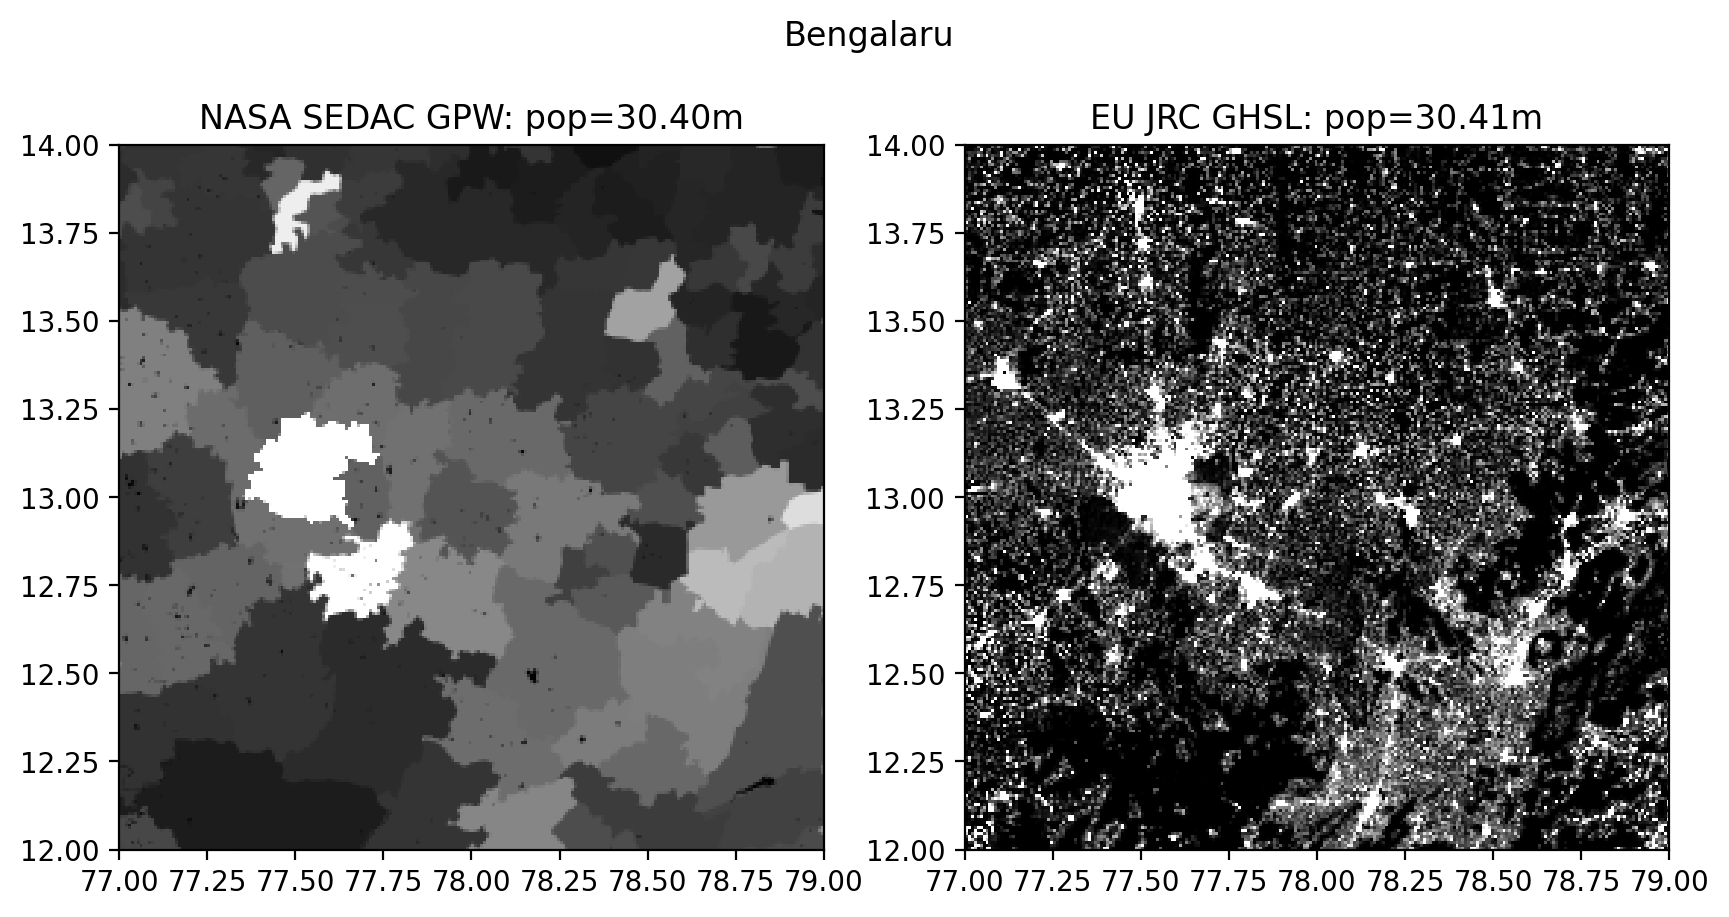

In [7]:
render("Bengalaru", 13, 78, 1)

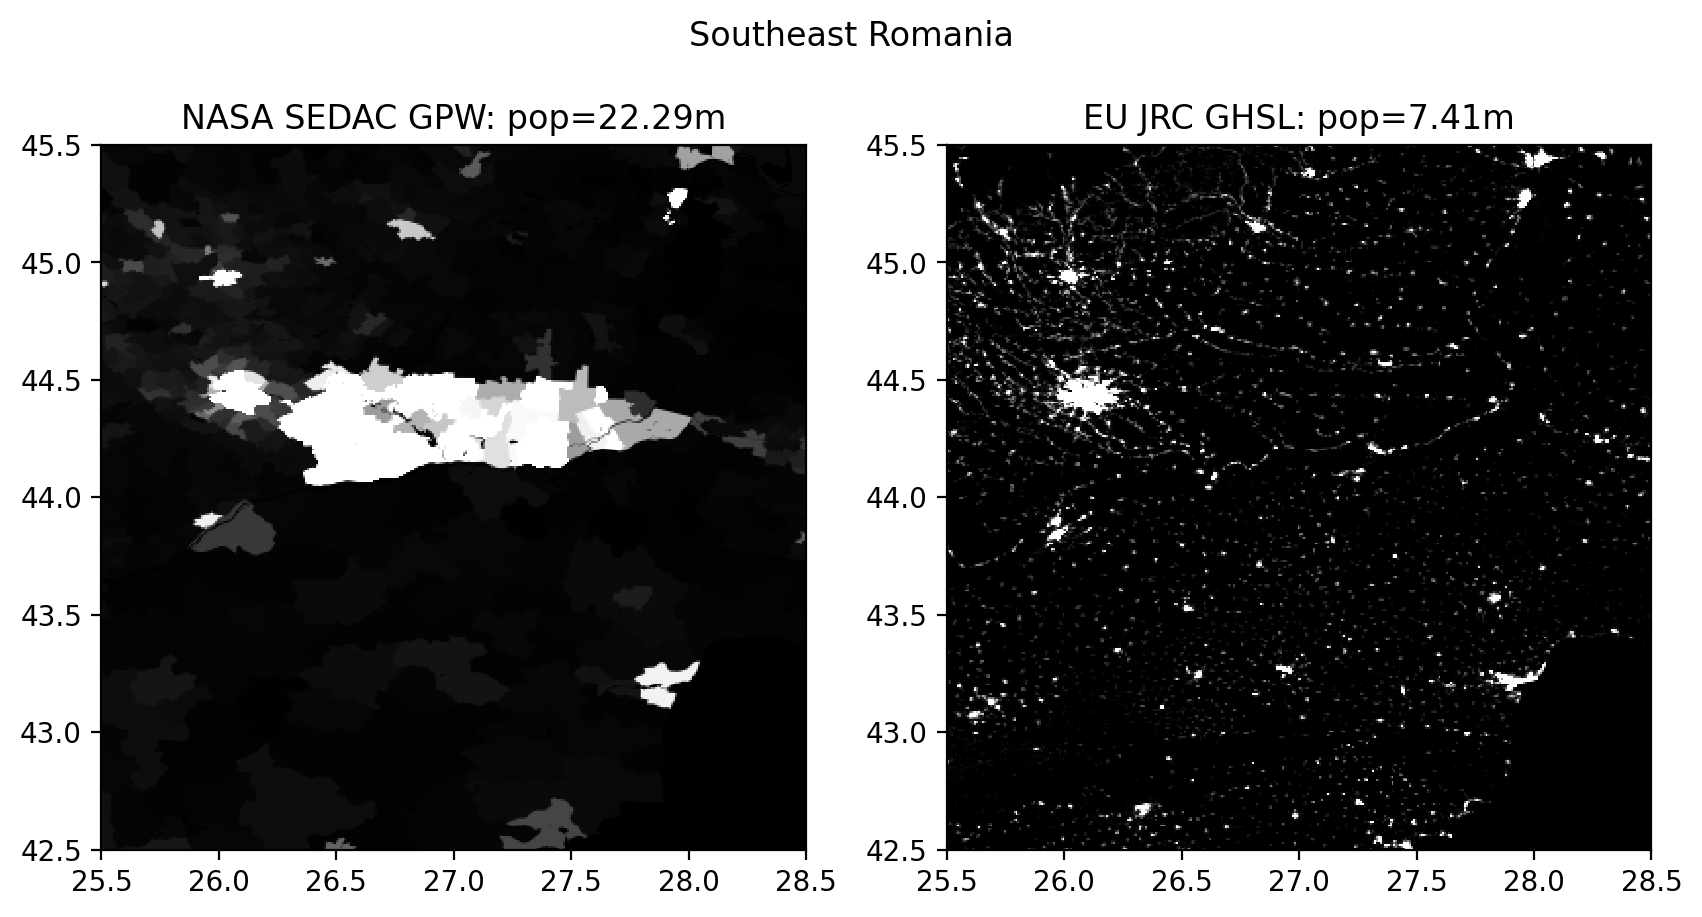

In [8]:
render("Southeast Romania", 44, 27, 1.5)

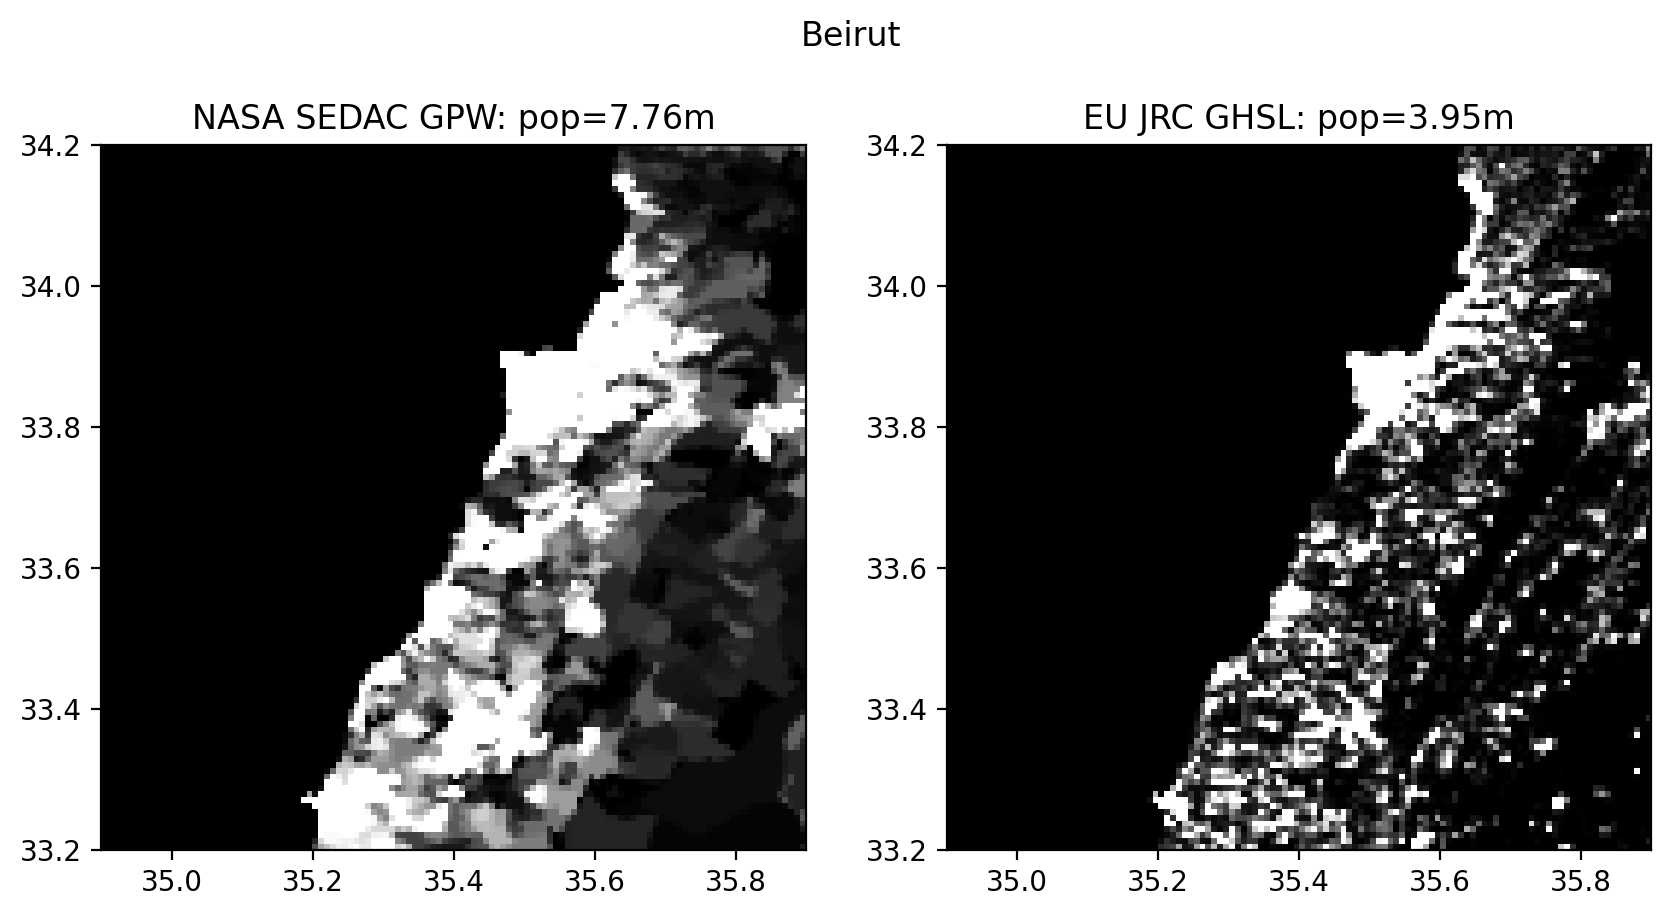

In [9]:
render("Beirut", 33.7, 35.4, .5)

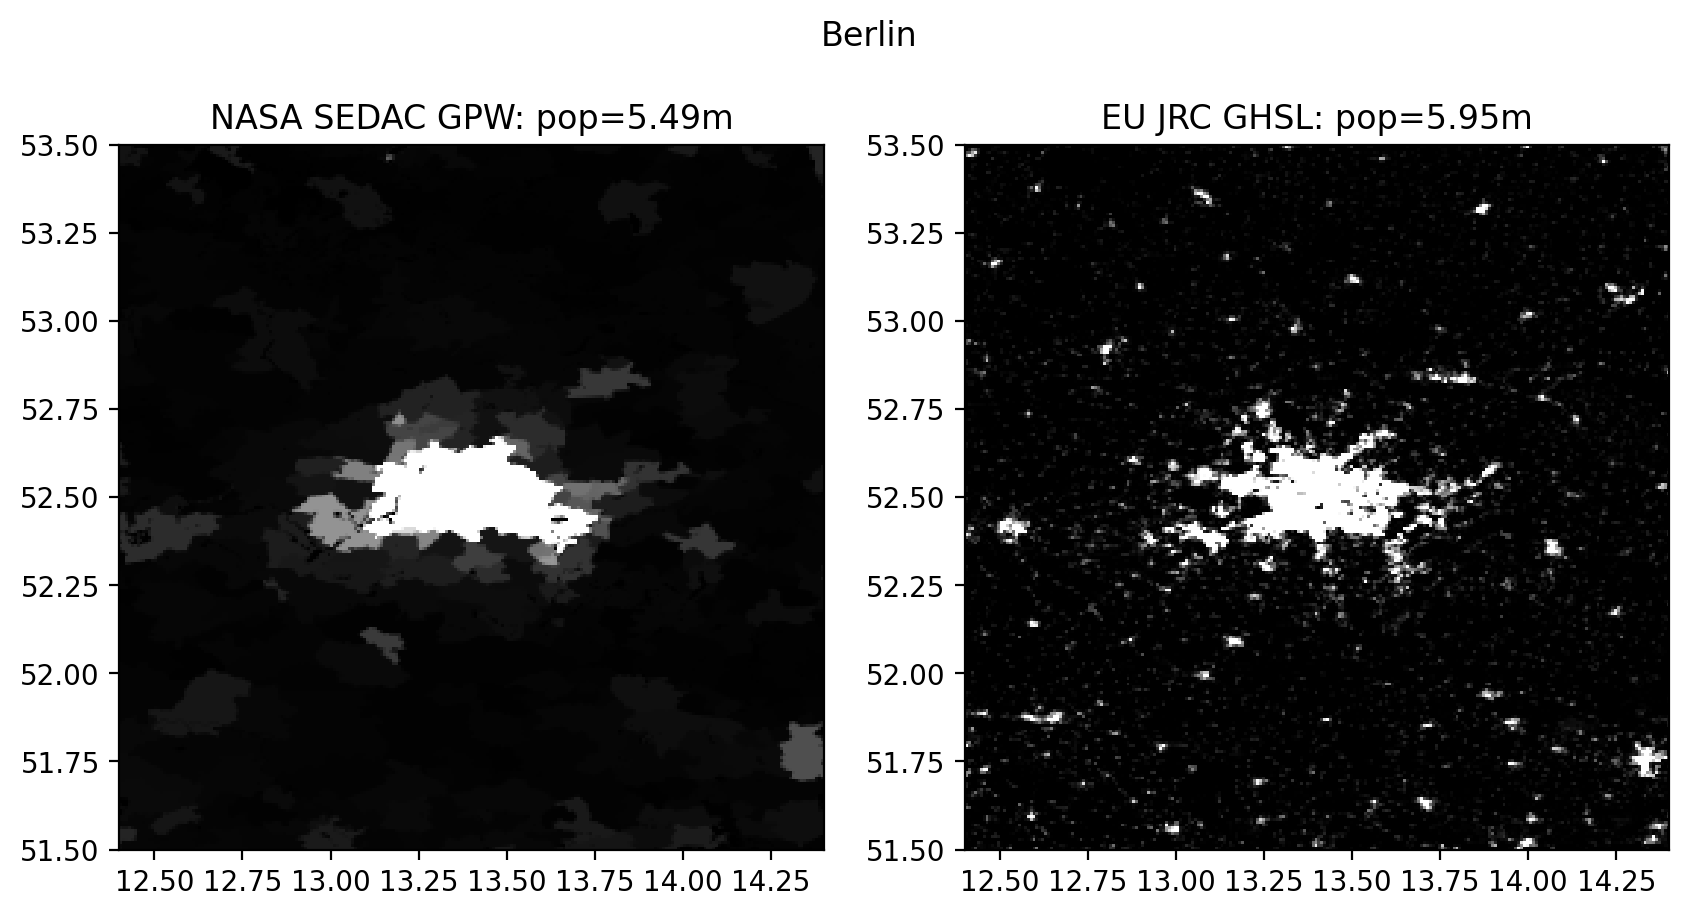

In [10]:
render("Berlin", 52.5, 13.4, 1)

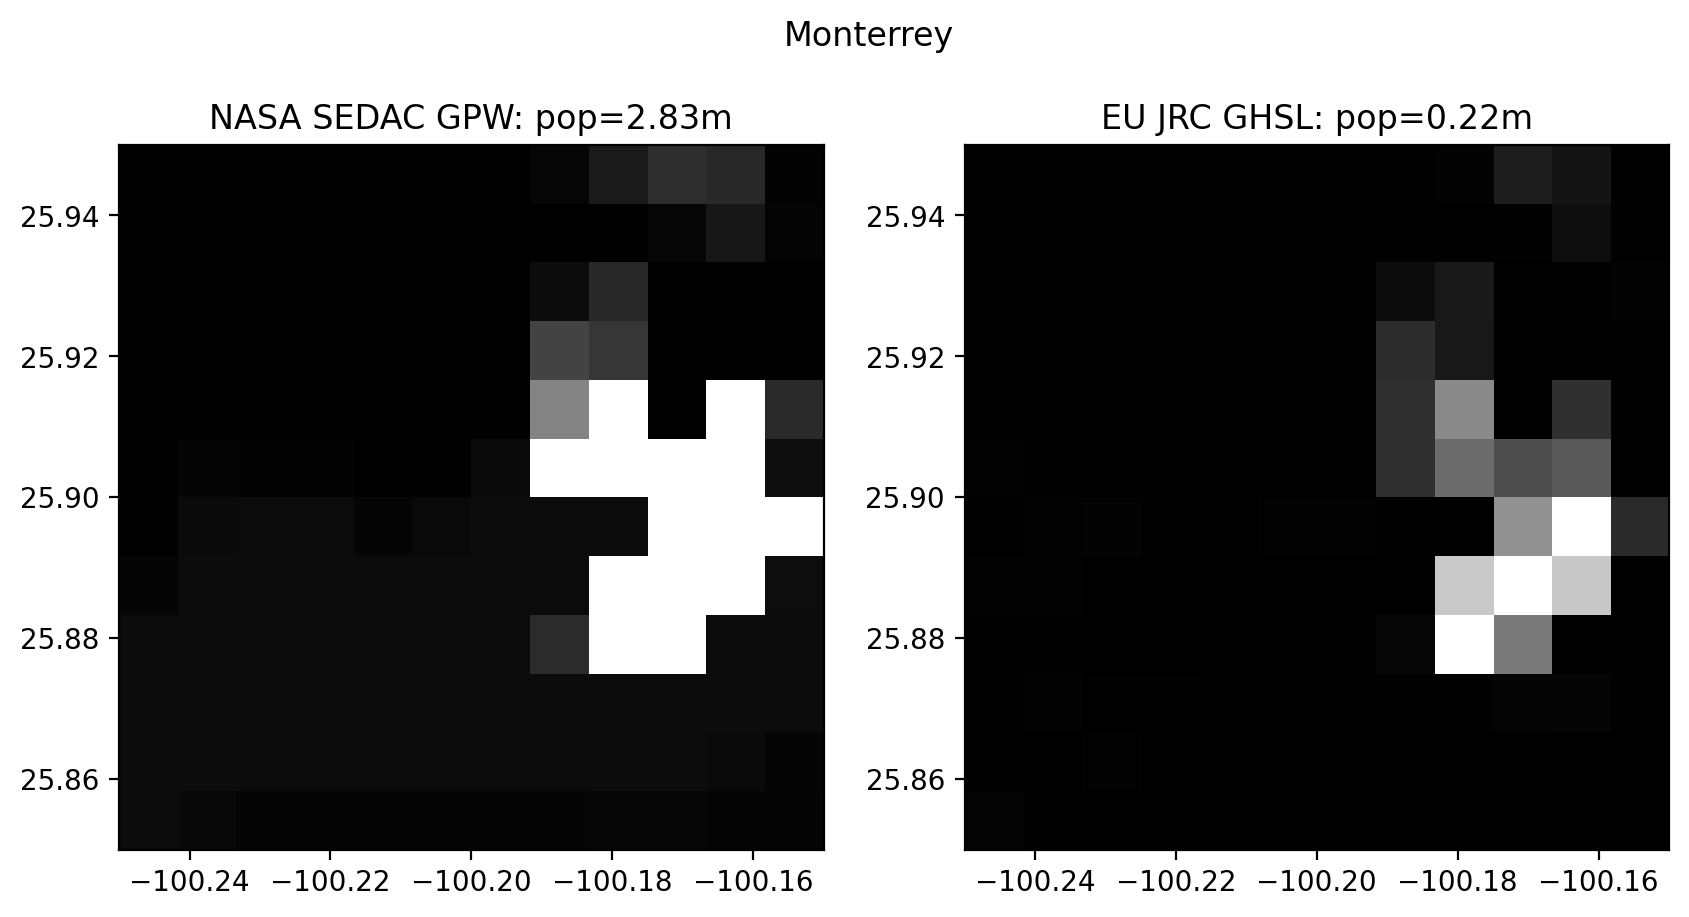

In [11]:
render("Monterrey", 25.9, -100.2, 0.05, lim=20_000)

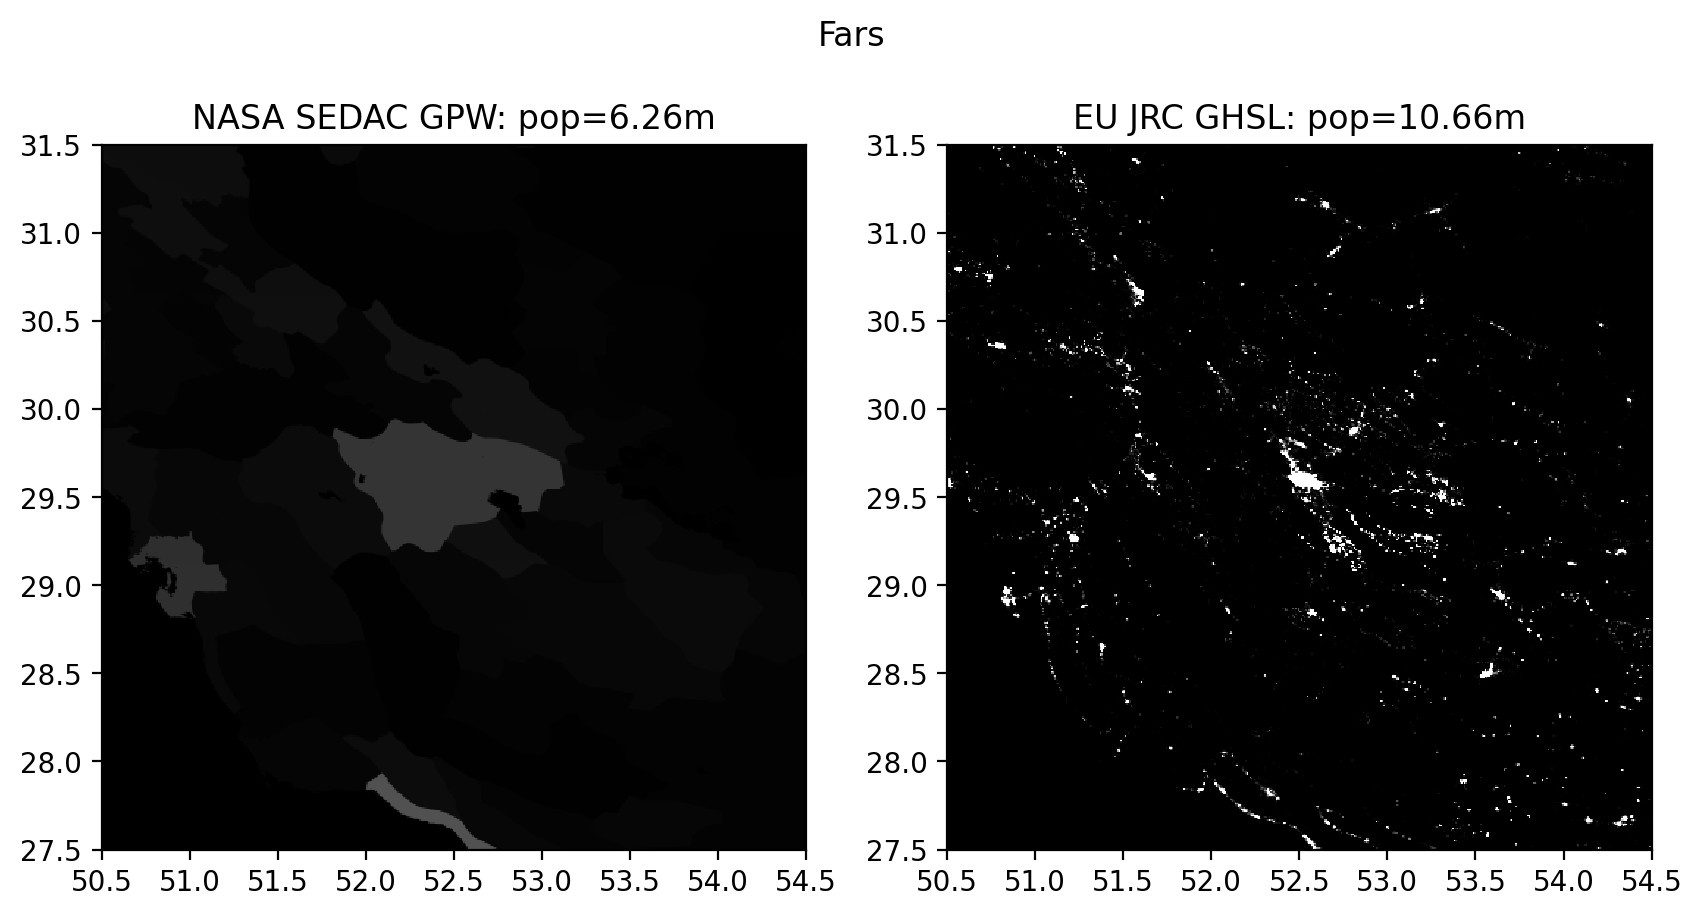

In [12]:
render("Fars", 29.5, 52.5, 2)